<a href="https://www.kaggle.com/code/anneysha/anna-karenina-nlp-analyses-basic?scriptVersionId=115631374" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [59]:
!pip install stop-words
!pip install nltk

# Feedback is welcome! It helps me learn.

In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words
import matplotlib.pyplot as plt
from nltk.tokenize import regexp_tokenize, word_tokenize, sent_tokenize
import re
import seaborn as sns
from nltk.tokenize.treebank import TreebankWordDetokenizer


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anna-karenina-en-ru/Anna Karenina_ru.txt
/kaggle/input/anna-karenina-en-ru/Anna Karenina_en.txt


# Procedure

1. Tokenise into words
2. Drop stop words and punctuation using list comprehensions
3. Find the average length of words
4. Using word cloud, visualise most common words

## Reading Anna Karenina

Here is a quick preview of the contents of the text files.

In [61]:
ak_en = open('/kaggle/input/anna-karenina-en-ru/Anna Karenina_en.txt').read()
ak_en[:1000]

'PART ONE\nChapter 1\nHappy families are all alike; every unhappy family is unhappy in its own way.\n\nEverything was in confusion in the Oblonskys’ house. The wife had discovered that the husband was carrying on an intrigue with a French girl, who had been a governess in their family, and she had announced to her husband that she could not go on living in the same house with him. This position of affairs had now lasted three days, and not only the husband and wife themselves, but all the members of their family and household, were painfully conscious of it. Every person in the house felt that there was no sense in their living together, and that the stray people brought together by chance in any inn had more in common with one another than they, the members of the family and household of the Oblonskys. The wife did not leave her own room, the husband had not been at home for three days. The children ran wild all over the house; the English governess quarreled with the housekeeper, and

In [62]:
ak_ru = open('/kaggle/input/anna-karenina-en-ru/Anna Karenina_ru.txt').read()
ak_ru[:1000]

'I\nВсе счастливые семьи похожи друг на друга, каждая несчастливая семья несчастлива\nпо-своему.\nВсе смешалось в доме Облонских. Жена узнала, что муж был в связи с бывшею в их\nдоме француженкою-гувернанткой, и объявила мужу, что не может жить с ним в одном\nдоме. Положение это продолжалось уже третий день и мучительно чувствовалось и\nсамими супругами, и всеми членами семьи, и домочадцами. Все члены семьи и\nдомочадцы чувствовали, что нет смысла в их сожительстве и что на каждом постоялом\nдворе случайно сошедшиеся люди более связаны между собой, чем они, члены семьи и\nдомочадцы Облонских. Жена не выходила из своих комнат, мужа третий день не было\nдома. Дети бегали по всему дому, как потерянные; англичанка поссорилась с экономкой и\nнаписала записку приятельнице, прося приискать ей новое место; повар ушел еще вчера со\nдвора, во время обеда; черная кухарка и кучер просили расчета.\nНа третий день после ссоры князь Степан Аркадьич Облонский — Стива, как его звали\nв свете, — в обычн

## Tokenising-Detokenising Anna Karenina and Pre-Processing

We only want words in our text file, and omit punctuation. We first tokenise the file such that only words are retained. While processing our text files, we also want to ensure that high frequency words like I, a, an - are omitted. These words are called stopwords.

After the text file has been tokensied, we do a list comprehension to remove stopwords.

In [63]:
pattern = "\w+"
ak_en_words = regexp_tokenize(ak_en, pattern)

# Get English Stopwords pack
stopwords = list(STOPWORDS)

# Weed out stopwords
ak_en_words_no_stopwords = [word for word in ak_en_words if stopwords.count(word) == 0]

# Preview
ak_en_words_no_stopwords[:10]

['PART',
 'ONE',
 'Chapter',
 '1',
 'Happy',
 'families',
 'alike',
 'every',
 'unhappy',
 'family']

We stitch back our text file using a Detokeniser.

In [64]:
ak_en_clean = TreebankWordDetokenizer().detokenize(ak_en_words_no_stopwords)

# Preview
ak_en_clean[:100]

'PART ONE Chapter 1 Happy families alike every unhappy family unhappy way Everything confusion Oblons'

A similar process is done for the Russian text file. However, before we attempt to remove the Russian stopwords, we need to get the stopwords pack for Russian using the `get_stop_words()` function.

In [70]:
pattern_ru = "\w+"
ak_ru_words = regexp_tokenize(ak_ru, pattern_ru)

# Get Russian Stopwords pack
stopwords_ru = get_stop_words('russian')

# Weed out stopwords
ak_ru_words_no_stopwords = [word for word in ak_ru_words if stopwords.count(word) == 0]

# Preview
ak_ru_words_no_stopwords[:10]

['I',
 'Все',
 'счастливые',
 'семьи',
 'похожи',
 'друг',
 'на',
 'друга',
 'каждая',
 'несчастливая']

In [71]:
ak_ru_clean = TreebankWordDetokenizer().detokenize(ak_ru_words_no_stopwords)

# Preview
ak_ru_clean[:100]

'I Все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему Все смеш'

# Some analyses 

## Word and Sentence Lengths

In [83]:
# Save lengths of each word as list
len_word_en = [len(w) for w in ak_en_words_no_stopwords]
len_word_ru = [len(w) for w in ak_ru_words_no_stopwords]

# Split the text into sentences
ak_sent_en = sent_tokenize(ak_en)
ak_sent_ru = sent_tokenize(ak_ru)

# Save lengths of each sentence as list
len_sent_en = [len(w) for w in ak_sent_en]
len_sent_ru = [len(w) for w in ak_sent_ru]

In [108]:
# Number of words in the english and russian versions of Anna Karenina [Russian, English]
[len(ak_ru_words_no_stopwords) , len(ak_en_words_no_stopwords)] 

[271162, 183716]

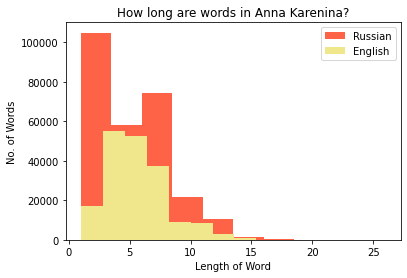

In [101]:
plt.hist(len_word_ru, color = 'tomato', label = "Russian")
plt.hist(len_word_en, color = 'khaki', label = "English")
plt.legend()
plt.xlabel("Length of Word")
plt.ylabel("No. of Words")
plt.title("How long are words in Anna Karenina?")
plt.show()

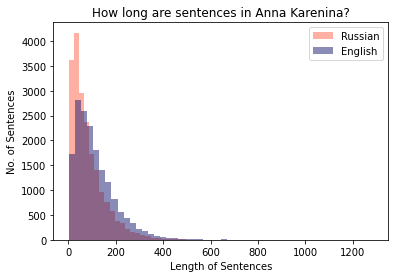

In [112]:
plt.hist(len_sent_ru, color = 'tomato', label = "Russian", bins = 50, alpha = 0.5)
plt.hist(len_sent_en, color = 'midnightblue', label = "English", bins = 50, alpha = 0.5)
plt.legend()
plt.xlabel("Length of Sentences")
plt.ylabel("No. of Sentences")
plt.title("How long are sentences in Anna Karenina?")
plt.show()

More than 50% of Russian words are shorter than five characters, whereas more English words are between five and ten characters long.

We cannot make an analysis on whether Russian words are shorter than English words in Anna Karenina. The English translation of Anna Karenina has 183,716 words while the original novel in Russian has 271,162 words. Since there is a difference of nearly 100,000 words, we cannot compare the two word and sentence lengths. 



## Wordclouds

Now that we have clean text files for Anna Karenina both in English and Russian, we create wordclouds to observe the most common words in each language.

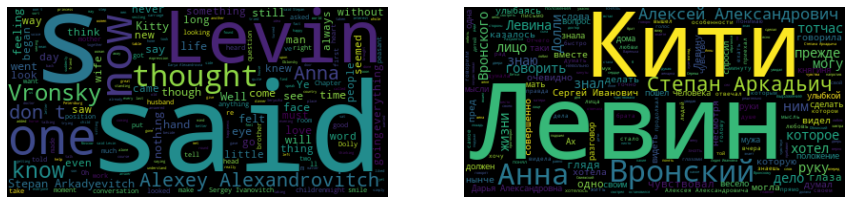

In [73]:
fig = plt.figure(figsize=(15,6))
ax = fig.subplots(1,2)

wordcloud_en = WordCloud()
wordcloud_en.generate(ak_en_clean)
plt.imshow(wordcloud_en, interpolation='bilinear')

wordcloud_ru = WordCloud(stopwords = stopwords_ru)
wordcloud_ru.generate(ak_ru_clean)
plt.imshow(wordcloud_ru, interpolation='bilinear')

ax[0].imshow(wordcloud_en, interpolation='bilinear')
ax[0].axis('off')
ax[1].imshow(wordcloud_ru, interpolation='bilinear')
ax[1].axis('off')

plt.show()

Levin and Vronsky are two of the most used words in the novel. We can safely assume that Levin is a very important character, followed by Vronsky, Anna, Alexey, Alexandrovitch, Stepan and Arkadyevitch. 'Said' is the most frequently used words in the novel which is not a proper noun. Thought is another commonly used word. My interpretation would be that this novel involves a lot of dialogues and is built on what the characters have perceived.

This is my first time running such an analyses on text files and I would like to explore whether `said` is a frequently used word in other English novels.

Now, onto the fun part - the Russian wordcloud. I'm so excited to pull out my Russian tools after so long, and get started.

Here are transliterations of proper nouns and translations of the words I find most striking:  
Кити - Kitty  
Левин - Levin  
Анна - Anna  
Степан - Stepan  
Вронский - Vronskyy  
говорит - said

I used https://translit.cc/ to transliterate from English to Russian. If you're studying Russian or a language offered by this website, I'd highly recommend this website to get started if you do not want to switch to a different keyboard yet. 

Surprisingly, Kitty and Levin were just as frequently mentioned in Russian as compared to the English counterpart. Kitty is even lesser mentioned than the other names that show up in the wordcloud. 

`говорит` also shows up as a frequently used word in the Russian version of the novel, although it is much smaller than its English counterpart.

I wish I could do more of an in-depth analysis, but my Russian knowledge is quite limited.

# Reflection and Next Steps

I'm quite happy with what I have achieved just by doing the first lesson of the first course in the Natural Language Processing skill track on Datacamp. This project was meant to be very short, and my attempt to explore features of a language that I learnt in the past.

The wordcloud could use some imporvements: The English wordcloud features stray words like `s` and `don't`. I assuming the stray `s` is the possessive marker that did not get stitched back into the name (and ideally should have been omitted). I will keep this is mind for future projects.

I would also like to re-analyse these texts, this time,omitting the high frequency proper nouns to have a better understanding of the common nouns each language uses in Anna Karenina. Then, try this on other novels in Russian and English. But for now, I will return to the next lesson in the course and learn more skills to apply on my future projects!

# References

[1] Stop-Words module: https://pypi.org/project/stop-words/#toc-entry-2  
[2] Wordcloud module: https://pypi.org/project/wordcloud/  
[3] Learn a new language with wordclouds: https://towardsdatascience.com/learn-a-language-with-wordclouds-d93c74dd6983  
[4] DataCamp Introduction to Natural Language Processing with Python course